In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sonardata/sonar.csv


* [<font size=4>Question 1:How to find fetaure importance from random forest</font>](#1)
* [<font size=4>Question 2: Can we use top features from random forest to improve decision tree</font>](#2)   
* [<font size=4>Question 3: Can we use random forest to improve random forest</font>](#3)   
* [<font size=4>Question 4: How to fit an AdaBoost](#4)  
* [<font size=4>Question 5: Effect of learning rate on AdaBoost</font>](#5)  

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
sonar=pd.read_csv("/kaggle/input/sonardata/sonar.csv")
sonar.head(5)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att52,att53,att54,att55,att56,att57,att58,att59,att60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# Question 1: How to find feature importance from random forest <a id="1"></a>

In [4]:
from sklearn.model_selection import train_test_split
X=sonar.iloc[:,0:60]
y=sonar.iloc[:,60]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestClassifier(n_estimators=40, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_tree = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.8846153846153846


In [16]:
score=rnd_clf.feature_importances_
fname=sonar.columns[:60]
df = pd.Series(score,index=fname)
df[0:10]

att1     0.016871
att2     0.005153
att3     0.008336
att4     0.020158
att5     0.012934
att6     0.006494
att7     0.005753
att8     0.009942
att9     0.039756
att10    0.014429
dtype: float64

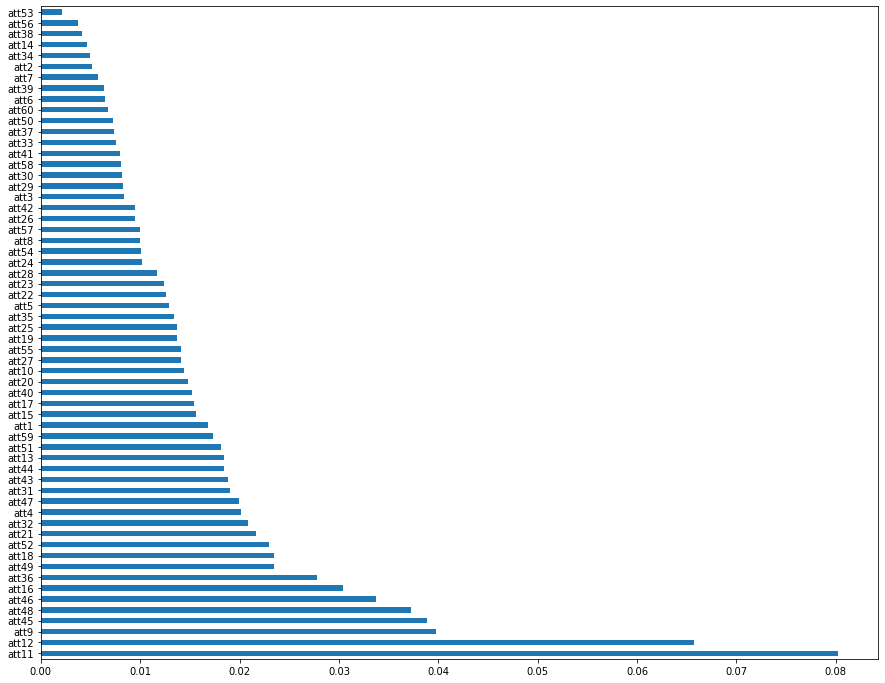

In [20]:
df.plot.barh(x='Method', y='feature imp.',figsize=(15,12))

In [19]:
df.sort_values(ascending=False, inplace=True)

In [ ]:
df

# Question 2: Can we use top features from random forest to improve decision tree <a id="2"></a>

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.7115384615384616


# Using random forests feature importance

In [22]:
import numpy as np
nc=np.arange(5,60,5)
acc=np.empty(11)
i=0
for k in np.nditer(nc):
    topf=df.index[0:k]
    tree_clf = DecisionTreeClassifier(random_state=42)
    tree_clf.fit(X_train[topf], y_train)
    y_pred_tree = tree_clf.predict(X_test[topf])
    acc[i]=accuracy_score(y_test, y_pred_tree)
    i = i + 1
acc

array([0.78846154, 0.80769231, 0.82692308, 0.76923077, 0.75      ,
       0.73076923, 0.71153846, 0.71153846, 0.75      , 0.71153846,
       0.69230769])

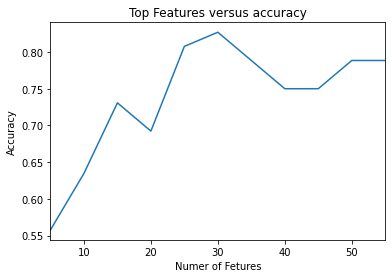

In [12]:
x=pd.Series(acc,index=nc)
x.plot()
# Add title and axis names
plt.title('Top Features versus accuracy')
plt.xlabel('Numer of Fetures')
plt.ylabel('Accuracy')
plt.show()

# Question 3: Can we use random forest to improve random forest <a id="3"></a>

In [13]:
top10=df.index[1:10]
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train[top10], y_train)
y_pred_rf = rnd_clf.predict(X_test[top10])
print(accuracy_score(y_test, y_pred_rf))

0.7307692307692307


# Question 4: How to fit an AdaBoost <a id="4"></a>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=400,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ad = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ad))

# Question 5: Effect of learning rate on AdaBoost <a id="1"></a>



In [ ]:
dfig = pd.DataFrame()
nc=np.arange(0.1,0.7,0.05)
 
for k in np.nditer(nc):
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=k, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_tree = ada_clf.predict(X_test)
    a_row = pd.Series([k, accuracy_score(y_test, y_pred_tree)])
    row_df = pd.DataFrame([a_row])
    dfig = pd.concat([row_df, dfig], ignore_index=False)


In [ ]:
dfig.columns=['Learning Rate','Accuracy']
dfig.sort_values(ascending=True, inplace=True,by=['Learning Rate'])
dfig.plot.line(x='Learning Rate', y='Accuracy',figsize=(15,8))
dfig.head(8)

# Question 6: How to fit GradientBoost <a id="6"></a>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=2, random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_gb))

# Question 7: How to regularize using max depth <a id="7"></a>

In [ ]:
dfig = pd.DataFrame()
nc=np.arange(2,10,1)
 
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=k, random_state=42)
    gb_clf.fit(X_train, y_train)
    y_pred_tree = gb_clf.predict(X_test)
    a_row = pd.Series([k, accuracy_score(y_test, y_pred_tree)])
    row_df = pd.DataFrame([a_row])
    dfig = pd.concat([row_df, dfig], ignore_index=False)

In [ ]:
dfig.columns=['Max Depth','Accuracy']
dfig.sort_values(ascending=True, inplace=True,by=['Max Depth'])
dfig.plot.line(x='Max Depth', y='Accuracy',figsize=(15,8))
dfig.head(10)

# Question 8: How to regularize using min sample leaves <a id="8"></a>

In [ ]:
dfig = pd.DataFrame()
nc=np.arange(20,0,-2)
 
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.5, max_depth=3,min_samples_leaf=int(k), random_state=42)
    gb_clf.fit(X_train, y_train)
    y_pred_tree = gb_clf.predict(X_test)
    a_row = pd.Series([k, accuracy_score(y_test, y_pred_tree)])
    row_df = pd.DataFrame([a_row])
    dfig = pd.concat([row_df, dfig], ignore_index=False)


In [ ]:
dfig.columns=['Min Samples Leaves','Accuracy']
dfig.sort_values(ascending=True, inplace=True,by=['Min Samples Leaves'])
dfig.plot.line(x='Min Samples Leaves', y='Accuracy',figsize=(15,8))

# Question 9: How to regularize using number of stages <a id="9"></a>

In [ ]:
dfig = pd.DataFrame()
nc=np.arange(10,300,20)
 
for k in np.nditer(nc):
    gb_clf = GradientBoostingClassifier(n_estimators=k, learning_rate=0.5, max_depth=3,min_samples_leaf=1, random_state=42)
    gb_clf.fit(X_train, y_train)
    y_pred_tree = gb_clf.predict(X_test)
    a_row = pd.Series([k, accuracy_score(y_test, y_pred_tree)])
    row_df = pd.DataFrame([a_row])
    dfig = pd.concat([row_df, dfig], ignore_index=False)

In [ ]:
dfig.columns=['Number of Stages','Accuracy']
dfig.sort_values(ascending=True, inplace=True,by=['Number of Stages'])
dfig.plot.line(x='Number of Stages', y='Accuracy',figsize=(15,8))
dfig.head(15)